In [35]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
# Task 1

In [36]:
Sales = pd.read_excel('Superstore.xls', index_col=0)
Sales
# Sales.head()
# Sales.describe()
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 1 to 8399
Data columns (total 22 columns):
Order ID                8399 non-null int64
Order Date              8399 non-null datetime64[ns]
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Discount                8399 non-null float64
Ship Mode               8399 non-null object
Profit                  8399 non-null float64
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null float64
Customer Name           8399 non-null object
City                    8399 non-null object
Zip Code                8399 non-null int64
State                   8399 non-null object
Region                  8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Name            8399 non-null object
Product Container       8399

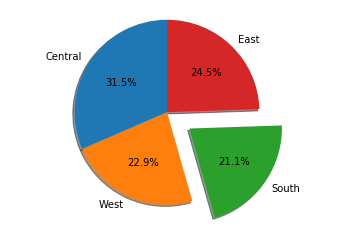

In [37]:
Sales["Sales"].groupby(Sales["Region"]).sum()

labels = Sales["Region"].unique()
sizes = Sales["Sales"].groupby(Sales["Region"]).sum()
explode = (0, 0, 0.3, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


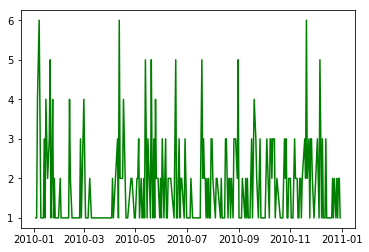

In [38]:
# Map the amount of high-priority shipments within 2010 on a timeline
new_sales = Sales.loc[:,['Order Priority','Ship Date']]
def get_year(value):
    return value.year

new_sales['year'] = new_sales['Ship Date'].apply(get_year)
# new_sales

new_df = new_sales[(new_sales['year'] == 2010)&(new_sales["Order Priority"] == "High")]
sorted_df = new_df.sort_values(by=['Ship Date'], inplace = True)
x = np.array(new_df['Ship Date'].unique())
y = np.array(new_df['Order Priority'].groupby(new_df['Ship Date']).count())
plt.plot(x,y,'g')
plt.show()


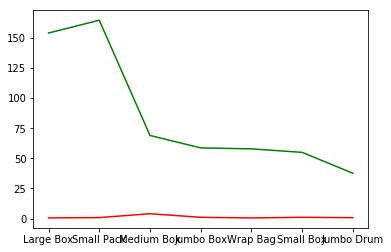

In [39]:
# Graph out the minimum and maximum shipping costs per container type.
df1 = Sales.loc[:,['Shipping Cost','Product Container']]
df1
x = np.array(df1['Product Container'].unique())
y1 = np.array(df1['Shipping Cost'].groupby(df1['Product Container']).max())
y2 = np.array(df1['Shipping Cost'].groupby(df1['Product Container']).min())

plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.show()

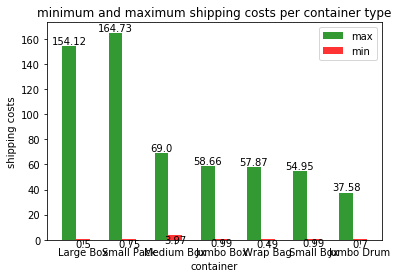

In [40]:
# Graph out the minimum and maximum shipping costs per container type.
x_data = df1['Product Container'].unique()
y1_data = df1['Shipping Cost'].groupby(df1['Product Container']).max()
y2_data = df1['Shipping Cost'].groupby(df1['Product Container']).min()

bar_width=0.3

plt.bar(x=range(len(x_data)), height=y1_data, label='max',
    color='g', alpha=0.8, width=bar_width)
plt.bar(x=np.arange(len(x_data))+bar_width, height=y2_data,
    label='min', color='r', alpha=0.8, width=bar_width)
for x, y in enumerate(y1_data):
    plt.text(x, y, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y2_data):
    plt.text(x+bar_width, y, '%s' % y, ha='center', va='top')

plt.title("minimum and maximum shipping costs per container type")
plt.xlabel("container")
plt.ylabel("shipping costs")

plt.xticks([r + bar_width for r in range(len(x_data))], x_data)

plt.legend()
plt.show()

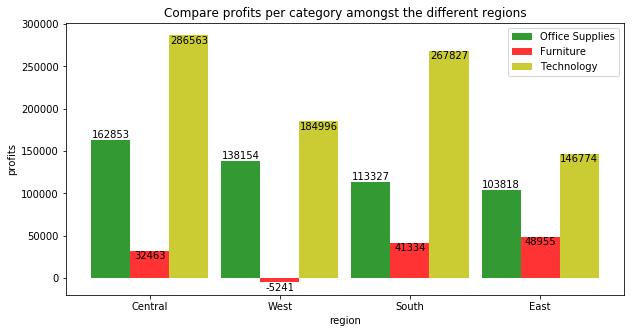

In [42]:
# Compare profits per category amongst the different regions
df2 = Sales.loc[:,['Profit','Product Category','Region']]
df2

x_data = df2['Region'].unique()
y1_data = df2[df2['Product Category']=='Office Supplies']["Profit"].astype(int).groupby(df2["Region"]).sum()
y2_data = df2[df2['Product Category']=='Furniture']["Profit"].astype(int).groupby(df2["Region"]).sum()
y3_data = df2[df2['Product Category']=='Technology']["Profit"].astype(int).groupby(df2["Region"]).sum()

bar_width=0.3

plt.subplots(figsize = (10,5))
plt.bar(x=range(len(x_data)), height=y1_data, label='Office Supplies',
    color='g', alpha=0.8, width=bar_width)
plt.bar(x=np.arange(len(x_data))+bar_width, height=y2_data,
    label='Furniture', color='r', alpha=0.8, width=bar_width)
plt.bar(x=np.arange(len(x_data))+bar_width*2, height=y3_data,
    label='Technology', color='y', alpha=0.8, width=bar_width)

for x, y in enumerate(y1_data):
    plt.text(x, y, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y2_data):
    plt.text(x+bar_width, y, '%s' % y, ha='center', va='top')
for x, y in enumerate(y3_data):
    plt.text(x+bar_width*2, y, '%s' % y, ha='center', va='top')
    
plt.title("Compare profits per category amongst the different regions")
plt.xlabel("region")
plt.ylabel("profits")

plt.xticks([r + bar_width for r in range(len(x_data))], x_data)

plt.legend()
plt.show()


In [ ]:
# Task 2

In [43]:
df = pd.read_csv('metro-bike-share-trip-data.csv',index_col='Trip ID')
df

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
Trip ID,,,,,,,,,,,,,,,,,,,,,
18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,6437.0,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,34.060558,-118.238327,3000.0,NaN,NaN,5923.0,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,5810.0,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,34.047749,-118.243172,3000.0,NaN,NaN,5951.0,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


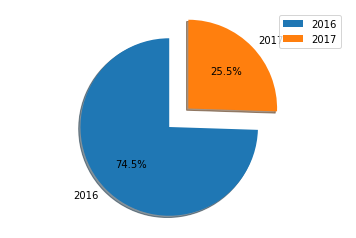

In [45]:
# first try : analyse the datas of 2016 and 2017
def get_year(value):
    return value.split('-')[0]
    
df['year'] = df['Start Time'].apply(get_year)

df1 = df[['year']]
sorted_years = df1.sort_values(by=['year'], ascending=True)
sorted_years

# sorted_years["year"].groupby(sorted_years["year"]).count()

labels = sorted_years["year"].unique()
sizes = sorted_years["year"].groupby(sorted_years["year"]).count()

explode = (0,0.3)  

fig1, ax1 = plt.subplots()

ax1.pie(sizes,explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.legend()
plt.show()

In [54]:
#short description: As the pie shows , we can find that the amount of the bikes' usage decreases significantly ,so I suggest
# that they can consider reducing the subscription plan.
df2 = df[["Starting Station ID"]]

sorted_station = df2.sort_values(by=['Starting Station ID'], ascending = False)

new_sorted_station=sorted_station.dropna()
new_sorted_station

# labels = new_sorted_station['Starting Station ID'].unique()
# sizes = new_sorted_station['Starting Station ID'].groupby(new_sorted_station['Starting Station ID']).count()

# # explode = (0,0.3)  
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes,labels = labels,autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  
# plt.legend()
# plt.show()

# unique_stations = new_sorted_station.drop_duplicates()

# df4=new_sorted_station['Starting Station ID'].groupby(new_sorted_station['Starting Station ID']).count()
# df4


,Starting Station ID
Trip ID,
4706104,4108.0
20013182,4108.0
4706275,4108.0
5063065,4108.0
20678791,4108.0
5053916,4108.0
22836809,4108.0
5081646,4108.0
4766921,4108.0


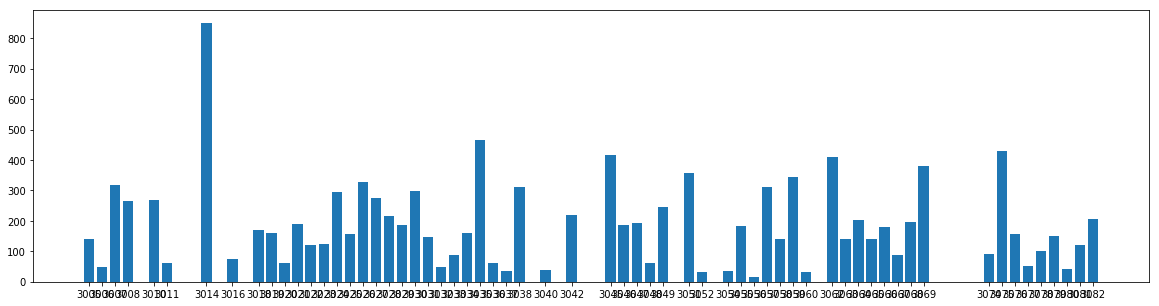

In [62]:
plt.subplots(figsize = (20,5))
# station_id_x = new_sorted_station["Starting Station ID"].unique()
# counts = new_sorted_station['Starting Station ID'].groupby(new_sorted_station['Starting Station ID']).count()
new_data = df.dropna()
station_id_x = new_data["Starting Station ID"].unique()
counts = new_data['Starting Station ID'].groupby(new_data['Starting Station ID']).count()
plt.xticks(station_id_x)
plt.bar(x = station_id_x,height=counts)
plt.show()

In [57]:
len(station_id_x)

67